In [2]:
!pip install fpl
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad
from agent import Agent

In [3]:
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]

agent = Agent(player_feature_names, opponent_feature_names, model_path="./trained_models/player_oppponent_linear_score_model.pt")
await agent.get_data()
await agent.update_model()

/home/ajrfhp/anaconda3/envs/control/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


(0.7850921673514567, tensor(0.4491, grad_fn=<DivBackward0>))


Player out Mohamed Naser El Sayed Elneny. To double trade  = False 


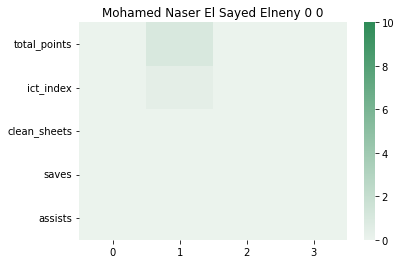

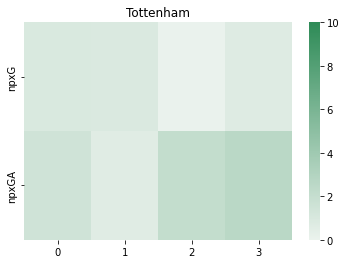

Player in Ismaila Sarr. To double trade  = False 


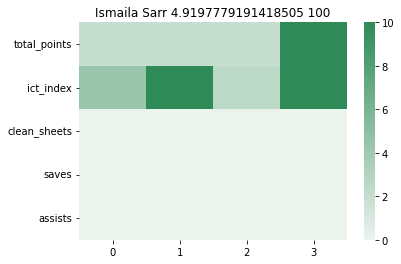

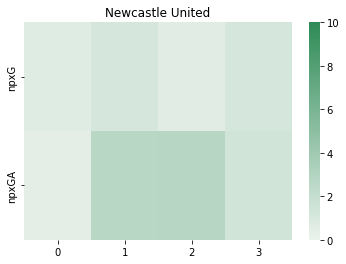

Player out Michail Antonio. To double trade  = False 


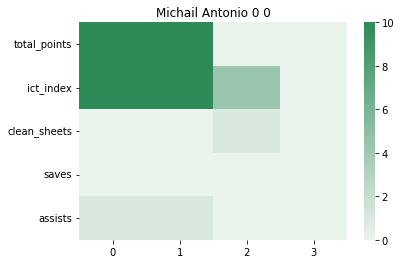

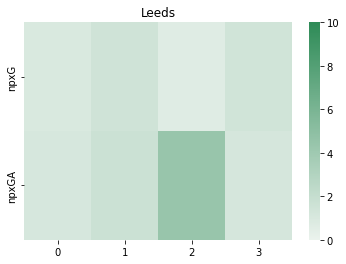

Player in Allan Saint-Maximin. To double trade  = False 


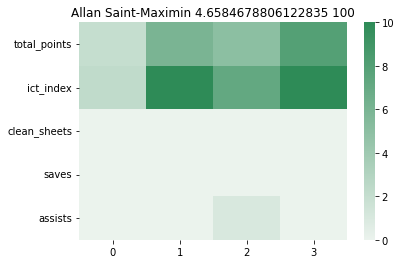

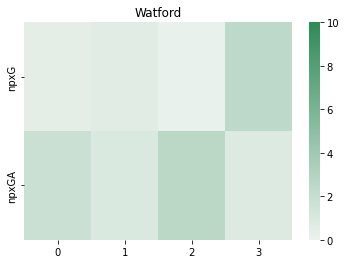

Ederson Santana de Moraes
Rúben Santos Gato Alves Dias
Oleksandr Zinchenko
Luke Shaw
Shane Duffy
Mohamed Salah
Sadio Mané
Pablo Fornals
Nicolas Pépé
Chris Wood
Jed Steer
Javier Manquillo
Troy Deeney
Ismaila Sarr
Allan Saint-Maximin
Ederson Santana de Moraes


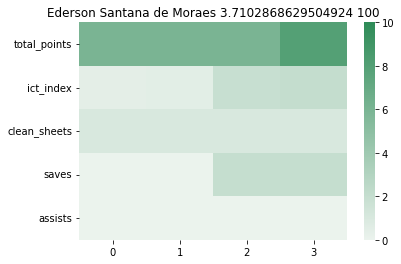

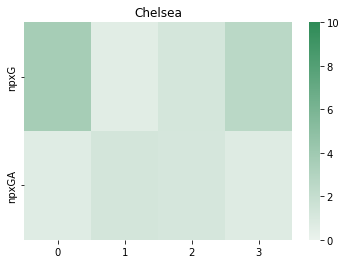

Rúben Santos Gato Alves Dias


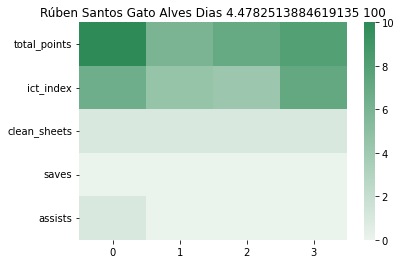

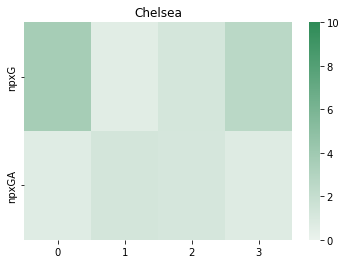

Luke Shaw


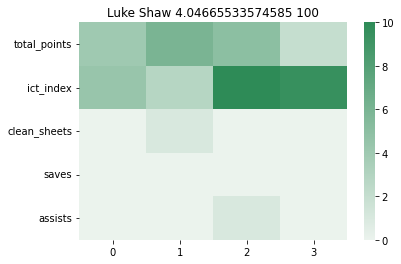

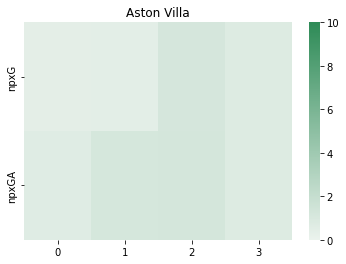

Shane Duffy


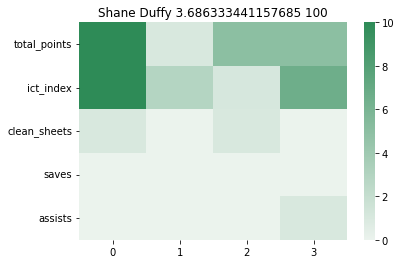

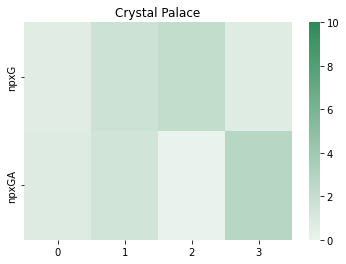

Mohamed Salah


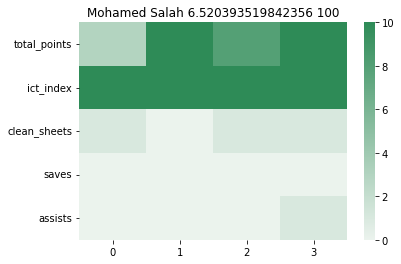

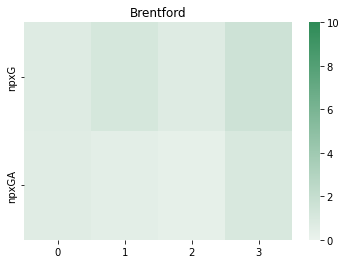

Sadio Mané


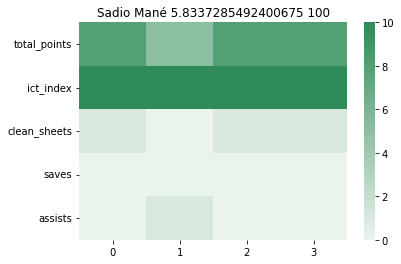

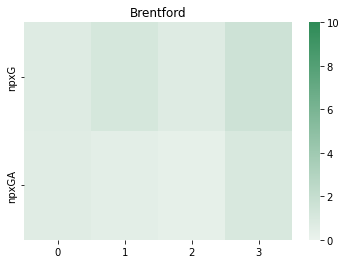

Ismaila Sarr


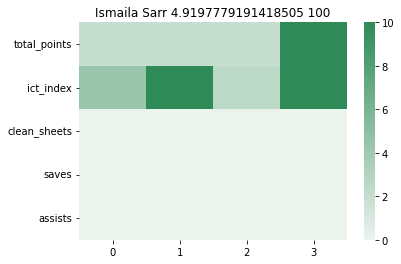

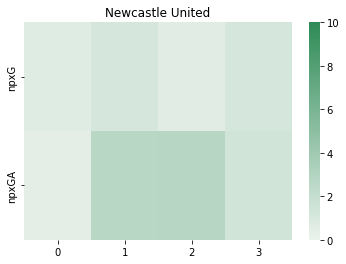

Nicolas Pépé


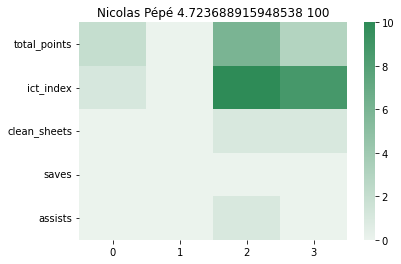

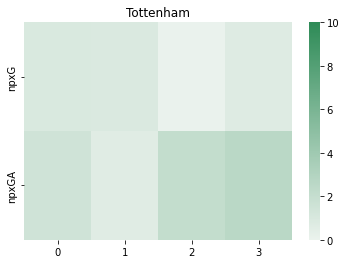

Pablo Fornals


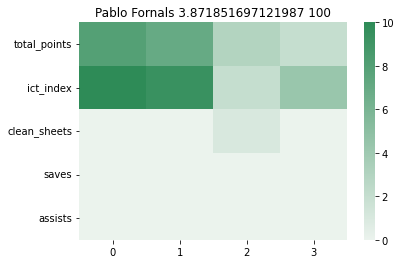

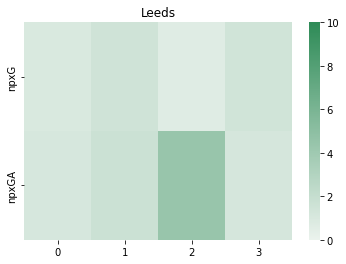

Allan Saint-Maximin


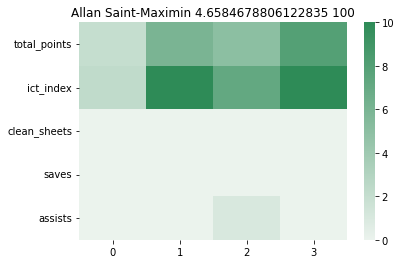

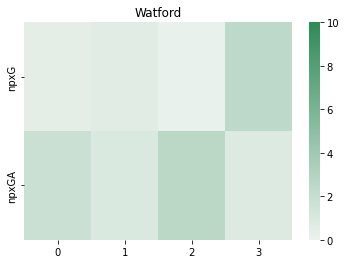

Chris Wood


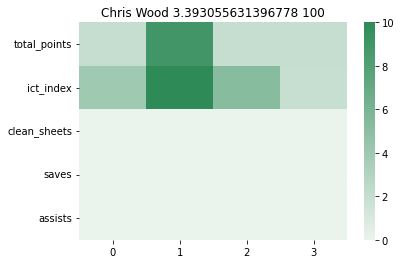

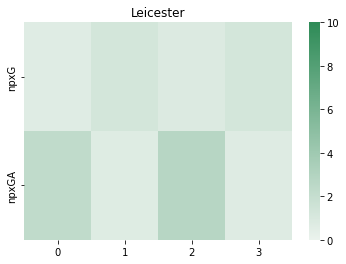

In [4]:
current_squad, non_squad = await agent.get_new_squad(player_feature_names, opponent_feature_names)
agent.set_playing_11(current_squad, visualize=True)





Goalkeeper
Hugo Lloris


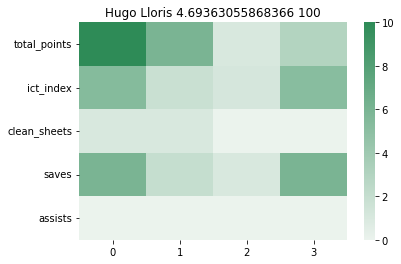

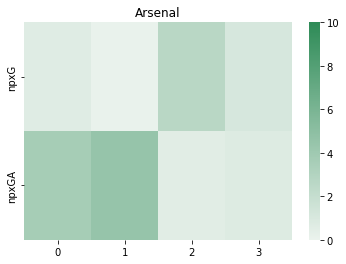

Illan Meslier


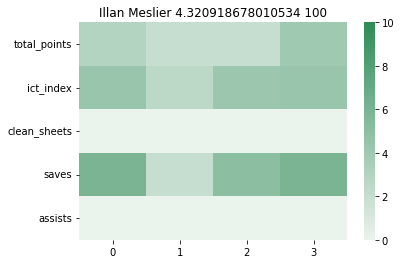

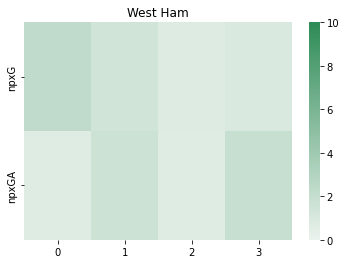

Alisson Ramses Becker


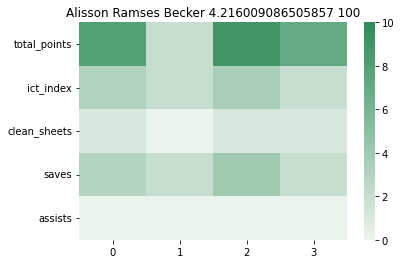

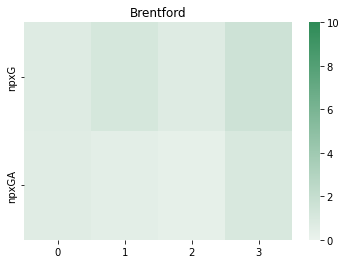

David de Gea


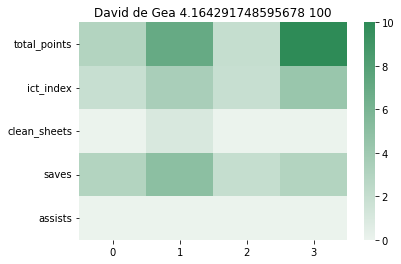

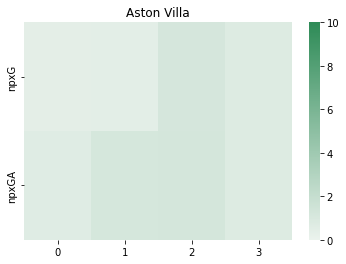

Vicente Guaita


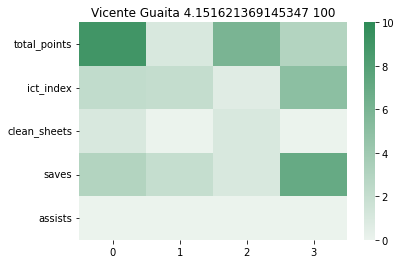

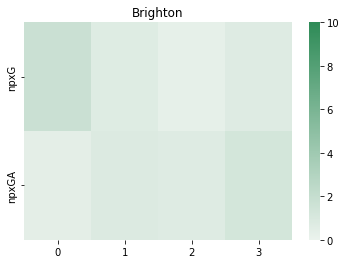










Defender
Marcos Alonso


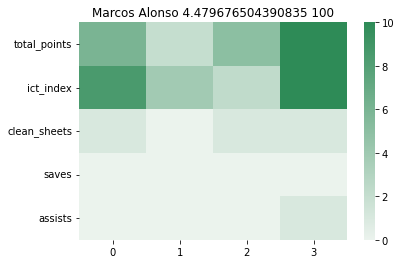

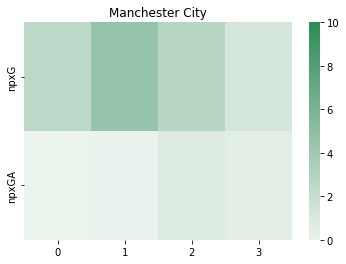

Rúben Santos Gato Alves Dias


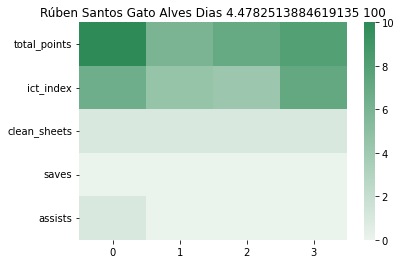

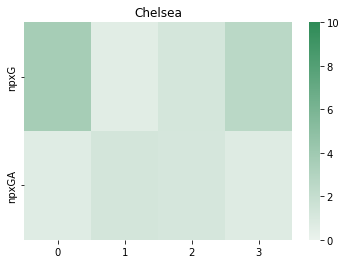

Trent Alexander-Arnold


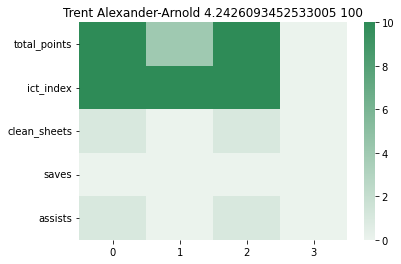

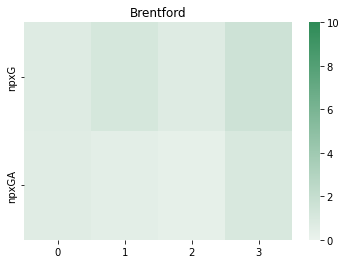

Thiago Emiliano da Silva


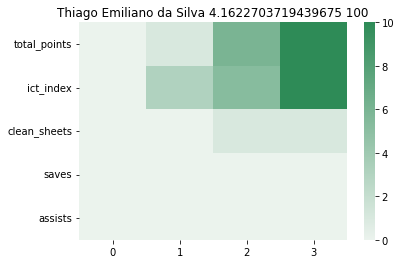

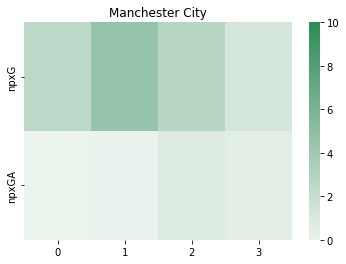

Luke Shaw


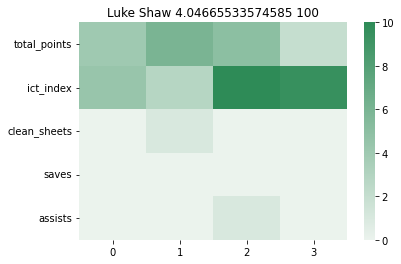

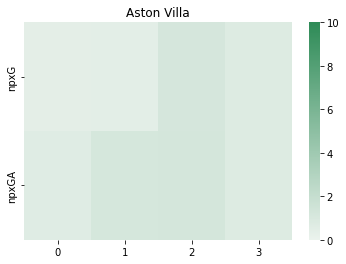










Midfielder
Mohamed Salah


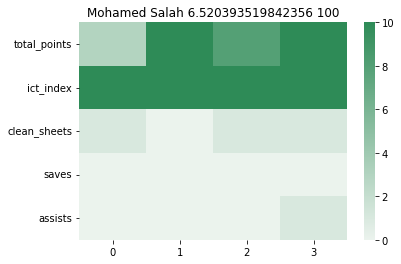

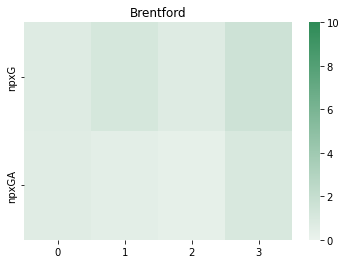

Sadio Mané


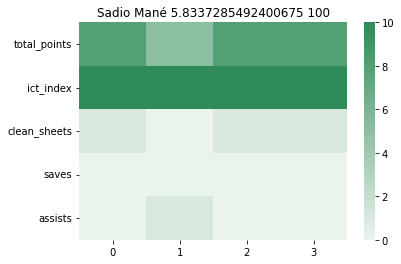

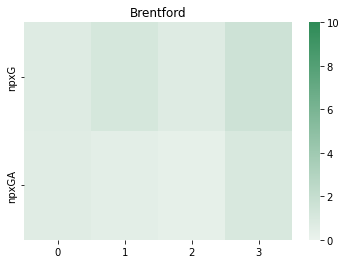

Ismaila Sarr


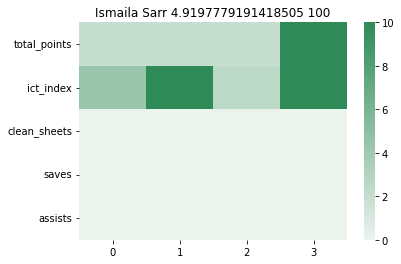

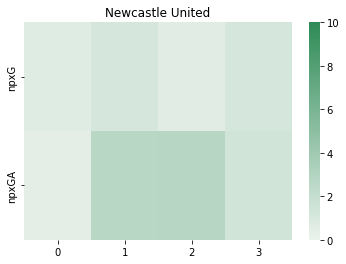

Demarai Gray


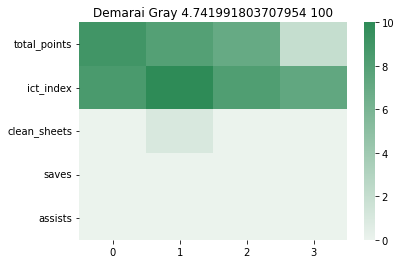

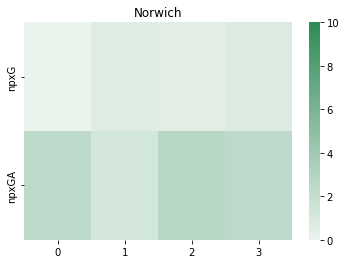

Nicolas Pépé


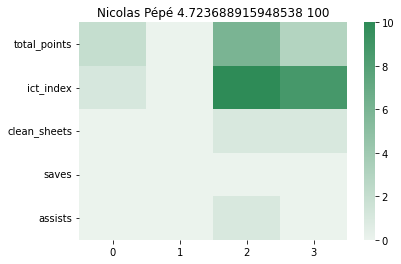

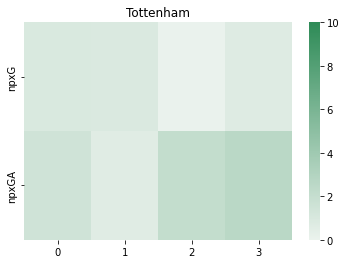










Forward
Romelu Lukaku


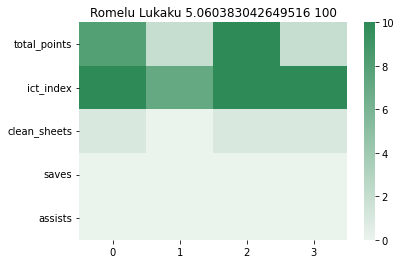

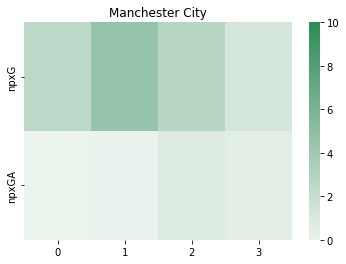

Allan Saint-Maximin


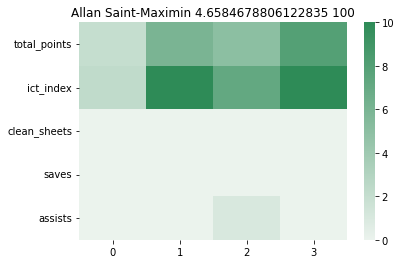

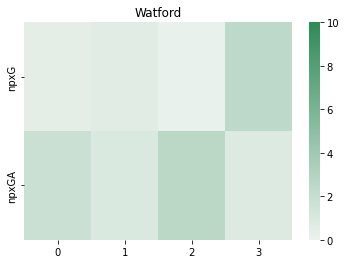

Pierre-Emerick Aubameyang


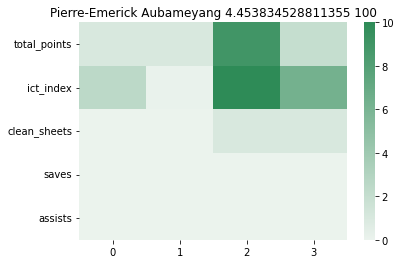

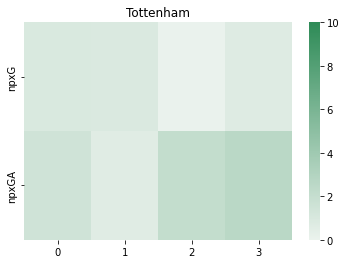

Gabriel Fernando de Jesus


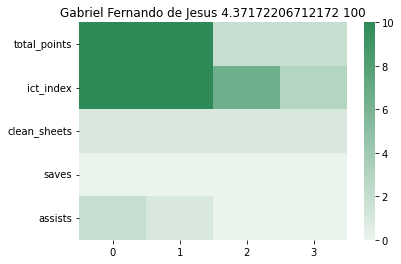

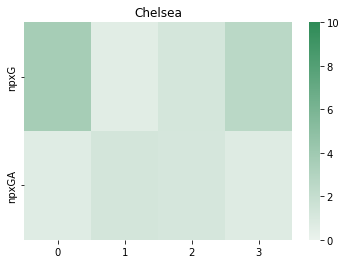

Jamie Vardy


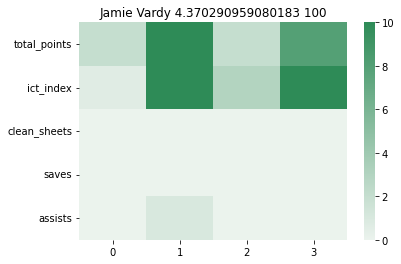

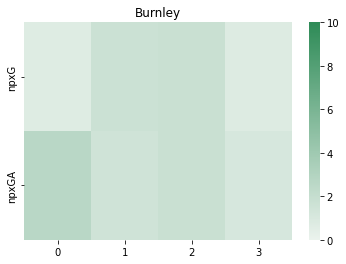

In [5]:
agent.show_top_performers(current_squad + non_squad, k=5)

In [6]:
gameweek = os.environ['GAME_WEEK']
os.system(f'cp agent.ipynb results/agent_{gameweek}.ipynb')
os.system(f'jupyter nbconvert --to html results/agent_{gameweek}.ipynb')

[NbConvertApp] Converting notebook results/agent_4_2021.ipynb to html
[NbConvertApp] Writing 1204990 bytes to results/agent_4_2021.html


0